Practica 3: Resolviendo el problema del XOR con Perceptrón Multicapa y Gradiente Descendente
Redes Neuronales y Aprendizaje Profundo
Rodrigo F. Román Godínez
Flores Lara Alberto
5BV1

Objetivo de la práctica: Esta práctica tiene como objetivo abordar el problema clásico del XOR utilizando una red neuronal con una capa oculta de dos neuronas, y aplicar el gradiente descendente para encontrar los mínimos locales de diversas funciones. Además, se evaluará el impacto de la tasa de aprendizaje (α) en el comportamiento del gradiente descendente.
Parte 1: Resolviendo el problema del XOR sin Gradiente Descendente
Objetivo: Resolver el problema lógico del XOR mediante un Perceptrón Multicapa (MLP) con una capa oculta sin utilizar ningún algoritmo de optimización como el gradiente descendente.
Los estudiantes encontrarán los pesos adecuados para que la red neuronal logre clasificar correctamente las entradas del XOR.
Instrucciones:
1. Arquitectura de la red:
* Entrada: 2 neuronas (una por cada valor de entrada del XOR).
* Capa oculta: 2 neuronas con activación sigmoide.
* Capa de salida: 1 neurona con activación sigmoide.
2. Relación de entradas y salidas (XOR):
* Entradas: (0,0),(0,1),(1,0),(1,1)
* Salidas esperadas: [0,1,1,0]
3. Función de activación:
* Usar la función sigmoide:
4. Ecuación de la salida de la red:
5. Encontrar manualmente los pesos y los bias:
* Los estudiantes deberán intentar encontrar los pesos que permiten que la red logre la clasificación correcta del XOR.
* Pistas: Comenzar con valores pequeños de pesos y ajustar manualmente hasta que la red produzca los resultados correctos para cada una de las entradas.
6. Simular la red con los pesos calculados:
* Después de encontrar los pesos correctos, los estudiantes deberán simular la red neuronal y verificar que la salida sea correcta para cada entrada del XOR.

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [26]:
#Definición de la clase MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de pesos y sesgos
        self.weights1 = np.array([[0.3, 0.3], [0.2, 0.2]])
        self.weights2 = np.array([[0.3], [0.3]])
        self.bias1 = np.array([[0.1, 0.2]]) 
        self.bias2 = np.array([[0.3]])  
    
    # Función sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #Derivada de la función sigmoide
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    #Paso hacia adelante
    def forward(self, x):
        self.layer1 = self.sigmoid(np.dot(x, self.weights1) + self.bias1)
        output = self.sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return output
    
    # Retropropagación del error
    def backward(self, x, y, output):
        # Calculo de los errores
        output_error = output - y
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.layer1)

        # Actualización de pesos y sesgos
        self.weights2 -= np.dot(self.layer1.T, output_delta)
        self.weights1 -= np.dot(x.T, hidden_delta)
        self.bias2 -= np.sum(output_delta, axis=0)
        self.bias1 -= np.sum(hidden_delta, axis=0)
    
    # Función de entrenamiento
    def train(self, x, y, iterations):
        for _ in range(iterations):
            output = self.forward(x)
            self.backward(x, y, output)


Parte 1: Resolviendo el problema XOR

In [27]:
# Datos de entrada y salida del problema XOR
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Inicialización y entrenamiento del MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1)
mlp.train(x, y, 1000)

# Probando la red entrenada en las entradas XOR
Predicion = mlp.forward(x)

#Se redondean los resultados
Predicion= np.round(Predicion)
print("Resultado del MLP para XOR:", Predicion)

# Evaluamos la precisión
print("Precisión: ", accuracy_score(y, Predicion))

Resultado del MLP para XOR: [[0.]
 [1.]
 [1.]
 [0.]]
Precisión:  1.0


Para el ajuste de pesos, todos empezaron con 0.1, y cada iteracion fallida se fueron modificando los valores aleatoriamente incrementando en valores de 0.1 hasta que se obtuvo durante varias iteraciones el resultado esperado.

Parte 2: Cálculo de mínimos locales de funciones usando Gradiente Descendente
Objetivo: Utilizar el algoritmo de gradiente descendente para encontrar los mínimos locales de varias funciones que dependen de diferentes cantidades de variables.
Instrucciones:
1. Funciones a optimizar:
* 𝑓(𝑥) = 𝑥^2 + 3𝑥 + 2
* 𝑓(𝑥, 𝑦) = 𝑥^2 + 𝑦^2 + 2𝑥𝑦
* 𝑓(𝑥, 𝑦, 𝑧) = 𝑥^2 + 𝑦^2 + 𝑧^2 + 𝑥𝑦 + 𝑥𝑧 + 𝑦𝑧
* 𝑓(𝑤, 𝑥, 𝑦, 𝑧) = 𝑤^2 + 𝑥^2 + 𝑦^2 + 𝑧^2 + 𝑤𝑥 + 𝑤𝑦 + 𝑤𝑧 + 𝑥𝑦 + 𝑥𝑧 + 𝑦𝑧
2. Paso a paso:
* Para cada función, derivar la función con respecto a cada variable.
* Implementar el algoritmo de gradiente descendente para actualizar los valores de las variables en cada iteración.
* Elegir un punto de inicio (valores iniciales de las variables) y observar cómo los valores se actualizan hacia un mínimo local.
3. Resultado esperado:
* Para cada función, encontrar los valores de las variables que minimizan la función.
* Implementar el algoritmo para encontrar los mínimos locales de las funciones indicadas.
* Graficar la trayectoria de los valores de las variables durante las iteraciones del gradiente descendente.

* 𝑓(𝑥) = 𝑥^2 + 3𝑥 + 2

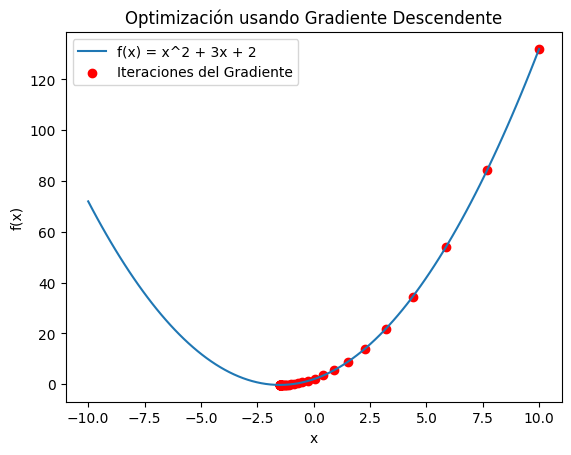

El valor óptimo de x es -1.4998358665153388


In [28]:
# Función f(x) = x^2 + 3x + 2
def f_x(x):
    return x**2 + 3*x + 2

#Derivada de la función f(x) = x^2 + 3x + 2
def df_dx(x):
    return 2*x + 3

# Gradiente Descendente
def gradiente_descendente(tasa_aprendizaje, x_inicial, iteraciones):
    x = x_inicial
    valores = []
    for i in range(iteraciones):
        valores.append(x)
        grad = df_dx(x)  # Calcula el gradiente
        x = x - tasa_aprendizaje * grad  #Actualiza x
    return x, valores

#Parámetros del algoritmo
tasa_aprendizaje = 0.1
x_inicial = 10
iteraciones = 50

# Ejecutamos el gradiente descendente
minimo_x, valores = gradiente_descendente(tasa_aprendizaje, x_inicial, iteraciones)

# Graficamos la trayectoria
x_vals = np.linspace(-10, 10, 100)
y_vals = f_x(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2 + 3x + 2')
plt.scatter(valores, [f_x(x) for x in valores], color='red', label='Iteraciones del Gradiente')
plt.title('Optimización usando Gradiente Descendente')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print(f"El valor óptimo de x es {minimo_x}")


* 𝑓(𝑥, 𝑦) = 𝑥^2 + 𝑦^2 + 2𝑥𝑦

In [29]:
# Función f(x,y) = x^2 + y^2 + 2xy
def f_xy(x, y):
    return x**2 + y**2 + 2*x*y

#Derivadas parciales de f(x, y)
def df_dx(x, y):
    return 2*x + 2*y

def df_dy(x, y):
    return 2*y + 2*x

# Gradiente descendente para dos variables
def gradiente_descendente_2d(tasa_aprendizaje, x_inicial, y_inicial, iteraciones):
    x, y = x_inicial, y_inicial
    for i in range(iteraciones):
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        x = x - tasa_aprendizaje * grad_x
        y = y - tasa_aprendizaje * grad_y
    return x, y

# Parámetros del algoritmo
tasa_aprendizaje = 0.1
x_inicial = 10 
y_inicial = 10
iteraciones = 50

#Ejecutamos el gradiente descendente
minimo_x, minimo_y = gradiente_descendente_2d(tasa_aprendizaje, x_inicial, y_inicial, iteraciones)

print(f"El valor óptimo es x = {minimo_x}, y = {minimo_y}")


El valor óptimo es x = 8.082812774647624e-11, y = 8.082812774647624e-11


* 𝑓(𝑥, 𝑦, 𝑧) = 𝑥^2 + 𝑦^2 + 𝑧^2 + 𝑥𝑦 + 𝑥𝑧 + 𝑦𝑧

In [30]:
#Función a optimizar: f(x,y,z) = x^2 + y^2 + z^2 + xy + xz + yz
def f_xyz(x, y, z):
    return x**2 + y**2 + z**2 + x*y + x*z + y*z

# Derivadas parciales de f(x,y,z
def df_dx(x, y, z):
    return 2*x + y + z 

def df_dy(x, y, z):
    return 2*y + x + z

def df_dz(x, y, z):
    return 2*z + x + y

# Gradiente Descendente
def gradiente_descendente_3d(tasa_aprendizaje, x_inicial, y_inicial, z_inicial, iteracones):
    x = x_inicial
    y = y_inicial
    z = z_inicial

    for i in range(iteracones):
        grad_x = df_dx(x, y, z) 
        grad_y = df_dy(x, y, z) 
        grad_z = df_dz(x, y, z) 
        x = x - tasa_aprendizaje * grad_x  
        y = y - tasa_aprendizaje * grad_y 
        z = z - tasa_aprendizaje * grad_z
    
    return x, y, z

# Parámetros del algoritmo
tasa_aprendizaje = 0.1
x_inicial = 10  
y_inicial = 10 
z_inicial = 10  
iteracones = 50

#Ejecutamos el gradiente descendente
minimo_x, minimo_y, minimo_z = gradiente_descendente_3d(tasa_aprendizaje, x_inicial, y_inicial, z_inicial, iteracones)

print(f"El valor óptimo es x = {minimo_x}, y = {minimo_y}, z= {minimo_z}")

El valor óptimo es x = 8.082812774647624e-11, y = 8.082812774647624e-11, z= 8.082812774647624e-11


* 𝑓(𝑤, 𝑥, 𝑦, 𝑧) = 𝑤^2 + 𝑥^2 + 𝑦^2 + 𝑧^2 + 𝑤𝑥 + 𝑤𝑦 + 𝑤𝑧 + 𝑥𝑦 + 𝑥𝑧 + 𝑦𝑧

In [31]:
# Función a optimizar: f(w,x,y,z) = w^2 + x^2 + y^2 + z^2 + wx + wy + wz + xy + xz + yz
def f_wxyz(w, x, y, z):
    return w**2 + x**2 + y**2 + z**2 + w*x + w*y + w*z + x*y + x*z + y*z

# Derivadas parciales de f(w,x,y,z)
def df_dw(w, x, y, z):
    return 2*w + x + y + z

def df_dx(w, x, y, z):
    return 2*x + w + y + z

def df_dy(w, x, y, z):
    return 2*y + w + x + z

def df_dz(w, x, y, z):
    return 2*z + w + x + y

# Gradiente Descendente
def gradiente_descendente_4d(tasa_aprendizaje, w_inicial, x_inicial, y_inicial, z_inicial, iteraciones):
    w = w_inicial
    x = x_inicial
    y = y_inicial
    z = z_inicial

    for i in range(iteraciones):
        grad_w = df_dw(w, x, y, z)
        grad_x = df_dx(w, x, y, z)
        grad_y = df_dy(w, x, y, z)
        grad_z = df_dz(w, x, y, z) 
        w = w - tasa_aprendizaje * grad_w 
        x = x - tasa_aprendizaje * grad_x 
        y = y - tasa_aprendizaje * grad_y 
        z = z - tasa_aprendizaje * grad_z
    
    return w, x, y, z

# Parámetros del algoritmo
tasa_aprendizaje = 0.1
w_inicial = 10
x_inicial = 10 
y_inicial = 10  
z_inicial = 10  
iteraciones = 10

# Ejecutamos el gradiente descendente
minimo_w, minimo_x, minimo_y, minimo_z  = gradiente_descendente_4d(tasa_aprendizaje, w_inicial, x_inicial, y_inicial, z_inicial, iteraciones)

print(f"El valor óptimo es w = {minimo_w}, x = {minimo_x}, y = {minimo_y}, z= {minimo_z},")


El valor óptimo es w = 0.009765625, x = 0.009765625, y = 0.009765625, z= 0.009765625,


Parte 3: Evaluación del impacto de la tasa de aprendizaje en el Gradiente Descendente
Objetivo:
Analizar cómo la elección de la tasa de aprendizaje (α) afecta el proceso de entrenamiento
de la red y la convergencia en el algoritmo de gradiente descendente.
Instrucciones:
1. Impacto de la tasa de aprendizaje: Se observarán tres comportamientos diferentes de la tasa de aprendizaje:
* Tasa de aprendizaje pequeña: El valor de α es muy bajo, lo que
provoca que el gradiente descendente avance muy lentamente hacia
el mínimo local.
* Tasa de aprendizaje mediana: Un valor de α que permite un avance
constante y adecuado hacia el mínimo local sin que el algoritmo se
estanque ni avance demasiado rápido.
* Tasa de aprendizaje grande: Un valor de α demasiado alto que
puede provocar que el algoritmo no converja o salte sobre los
mínimos locales.
2. Determinar los valores de α:
* α pequeño:
* α mediano:
* α grande:
- Graficar la función de las iteraciones para cada α en la función f(x)y analizar los
resultados.

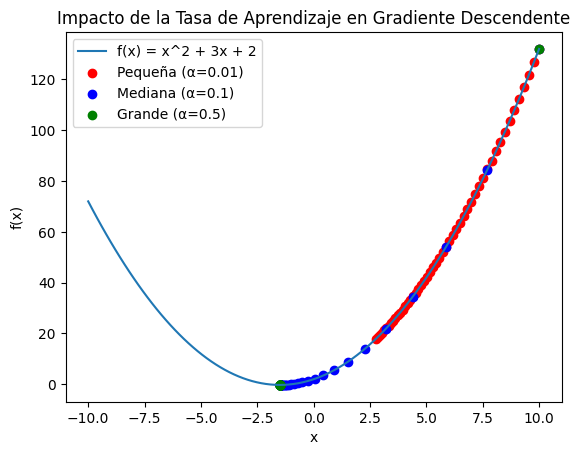

In [32]:
# Función a optimizar: f(x) = x^2 + 3x + 2
def f_x(x):
    return x**2 + 3*x + 2

# Derivada de la función f(x)
def df_dx(x):
    return 2*x + 3

# Gradiente Descendente
def gradiente_descendente(tasa_aprendizaje, x_inicial, iteraciones):
    x = x_inicial
    valores = []
    for i in range(iteraciones):
        valores.append(x)
        grad = df_dx(x)
        x = x - tasa_aprendizaje * grad
    return x, valores

# Parámetros del algoritmo
x_inicial = 10 
iteraciones = 50

#Definimos las diferentes tasas de aprendizaje
tasa_aprendizajes = [0.01, 0.1, 0.5]  # Pequeño, mediano y grande

# Graficamos la trayectoria para cada tasa de aprendizaje
valores_x = np.linspace(-10, 10, 100)
valores_y = f_x(valores_x)

plt.plot(valores_x, valores_y, label='f(x) = x^2 + 3x + 2')

colors = ['red', 'blue', 'green']
labels = ['Pequeña (α=0.01)', 'Mediana (α=0.1)', 'Grande (α=0.5)']

for i, lr in enumerate(tasa_aprendizajes):
    optimal_x, valores = gradiente_descendente(lr, x_inicial, iteraciones)
    plt.scatter(valores, [f_x(x) for x in valores], color=colors[i], label=labels[i])

plt.title('Impacto de la Tasa de Aprendizaje en Gradiente Descendente')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


La curva azul y las diferentes series de puntos muestran cómo cada tasa de aprendizaje afecta la trayectoria de x a lo largo de las iteraciones del gradiente descendente.

* Tasa Pequeña (α=0.01) (puntos rojos): Se observa una trayectoria gradual, en donde el valor de x cambia lentamente. El descenso es controlado, pero puede ser ineficiente si se busca una convergencia rápida. En las primeras iteraciones, el punto inicial (10) se desplaza levemente.

* Tasa Mediana (α=0.1) (puntos azules): Esta tasa logra una convergencia más rápida en comparación con la tasa pequeña. Se nota que x se acerca más velozmente al mínimo, lo que se refleja en que los puntos se alinean más rápidamente con el valor mínimo de la curva.

* Tasa Grande (α=0.5) (puntos verdes): Con una tasa alta, x se mueve agresivamente hacia el mínimo. Se puede ver en la gráfica que los puntos verdes cubren menos iteraciones, lo que indica que se realizaron menos pasos significativos.